# Set Directory Path

In [ ]:
import os
from pathlib import Path
p = Path.cwd().resolve()
while p != p.parent and not (p / 'requirements.txt').exists() and not (p / 'data').exists():
    p = p.parent

os.chdir(str(p/"src"))

# Plotting Loss and Accuracies

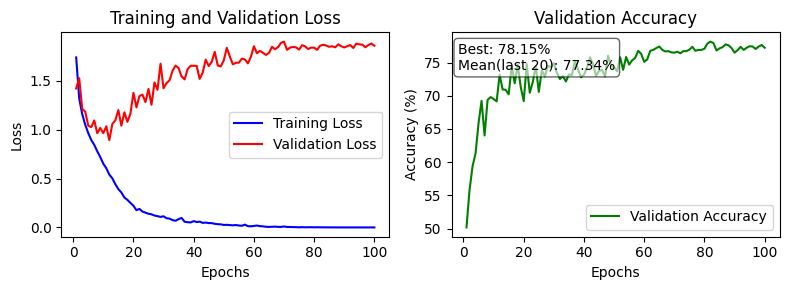

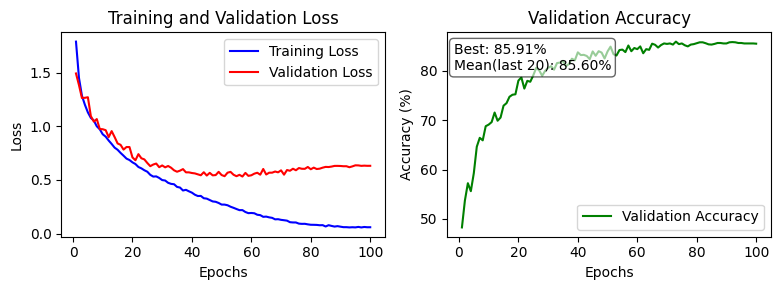

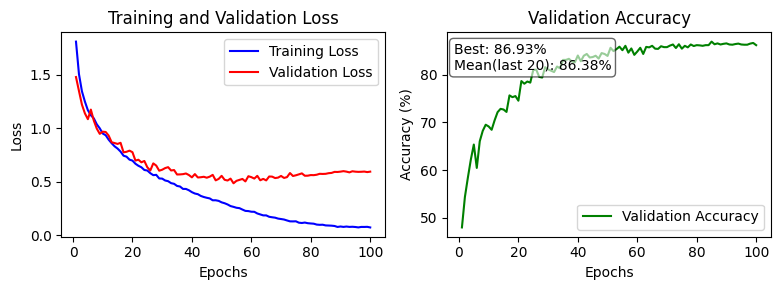

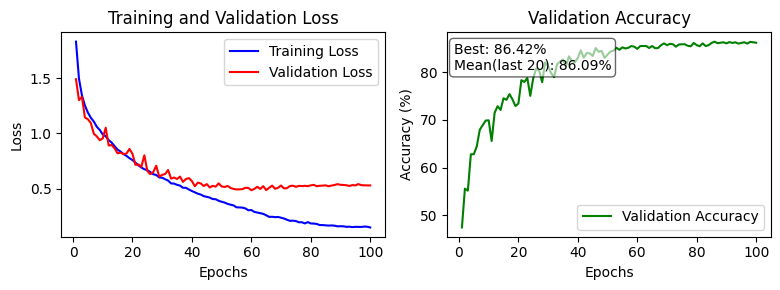

In [2]:
from utils import plot_from_csv

plot_from_csv(source='../experiments/logs/training_log_Tier0.csv', dest='../plots/aug_tier_0.png')
plot_from_csv(source='../experiments/logs/training_log_Tier1.csv', dest='../plots/aug_tier_1.png')
plot_from_csv(source='../experiments/logs/training_log_Tier2.csv', dest='../plots/aug_tier_2.png')
plot_from_csv(source='../experiments/logs/training_log_Tier3.csv', dest='../plots/aug_tier_3.png')



In [4]:
from eval import evaluateClassAccuracy
from model import build_model
import torch
from data import build_dataloaders

# build dataloaders (match augmentation tier & size that was used for training)
p = Path.cwd().resolve().parent  # adjust as needed
train_loader, val_loader, test_loader, meta = build_dataloaders(data_root=str(p/'data'), size=128, batch_size=64, augmentationTier=0, seed=67)


for i in range(4):
    print(f"Final Evaluation on Test Set (Tier{i}):")
    ckpt_path = f"../experiments/checkpoints/model_epoch_best_Tier{i}.pth"
    model = build_model(name="mobilenet_v2", num_classes=len(meta["class_names"]))
    checkpoint = torch.load(ckpt_path, map_location="cpu")
    model.load_state_dict(checkpoint["model_state_dict"])
    model.eval()
    evaluateClassAccuracy(model, test_loader, torch.nn.CrossEntropyLoss())

Discovered 21710 samples in 10 classes.
Augmentation Tier 0 - Train/val/test split: 17380/2165/2165
Final Evaluation on Test Set (Tier0):
Overall Accuracy: 75.70%
Per-Class Accuracies:
Class 0: 63.08%
Class 1: 70.67%
Class 2: 82.76%
Class 3: 80.79%
Class 4: 71.11%
Class 5: 75.25%
Class 6: 56.82%
Class 7: 73.49%
Class 8: 87.17%
Class 9: 95.26%
Final Evaluation on Test Set (Tier1):
Overall Accuracy: 84.43%
Per-Class Accuracies:
Class 0: 77.10%
Class 1: 80.00%
Class 2: 89.16%
Class 3: 88.18%
Class 4: 80.89%
Class 5: 82.67%
Class 6: 75.00%
Class 7: 82.79%
Class 8: 90.71%
Class 9: 97.41%
Final Evaluation on Test Set (Tier2):
Overall Accuracy: 85.77%
Per-Class Accuracies:
Class 0: 78.04%
Class 1: 85.78%
Class 2: 89.66%
Class 3: 86.70%
Class 4: 84.89%
Class 5: 79.21%
Class 6: 73.64%
Class 7: 89.77%
Class 8: 92.48%
Class 9: 96.55%
Final Evaluation on Test Set (Tier3):
Overall Accuracy: 85.59%
Per-Class Accuracies:
Class 0: 75.70%
Class 1: 85.33%
Class 2: 88.67%
Class 3: 90.15%
Class 4: 81.33%
